# Uber Data Analysis using Python

This notebook is a continuation of the " Uber Basic Data Analysis " notebook. 

It contains more in depth visualizations ( Heatmaps, spatial visualizations and animation ) of the Uber Pickups in New York City data set.

The analysis is broken up into 3 sections:
- Data Loading and Preparation ( same as the " Uber Basic Data Analysis " notebook ).
- Cross Analysis through heatmaps.
- Spatial visualization and animation.

The dataset can be found on https://github.com/fivethirtyeight/uber-tlc-foil-response/tree/master/uber-trip-data.

## 1. Data Loading and Preparation

### 1.1 Loading Modules

The matplotlib basemap toolkit is a library for plotting 2D data on maps in Python. In order to install the basemap using conda.
##### conda install -c anaconda basemap

In [0]:
import pandas as pd
import numpy as np

#Visualization modules
import matplotlib.pyplot as plt
import seaborn as sns

from mpl_toolkits.basemap import Basemap
from matplotlib import cm #Colormap

#Animation Modules
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

%matplotlib inline

### 1.2 Loading Data

In [0]:
#Load the datasets

df_apr14=pd.read_csv("data/uber-raw-data-apr14.csv")
df_may14=pd.read_csv("data/uber-raw-data-may14.csv")
df_jun14=pd.read_csv("data/uber-raw-data-jun14.csv")
df_jul14=pd.read_csv("data/uber-raw-data-jul14.csv")
df_aug14=pd.read_csv("data/uber-raw-data-aug14.csv")
df_sep14=pd.read_csv("data/uber-raw-data-sep14.csv")

#Merge the dataframes into one

df = df_apr14.append([df_may14,df_jun14,df_jul14,df_aug14,df_sep14], ignore_index=True)

### 1.3 Data Preparation

In [0]:
df.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534327 entries, 0 to 4534326
Data columns (total 4 columns):
Date/Time    object
Lat          float64
Lon          float64
Base         object
dtypes: float64(2), object(2)
memory usage: 138.4+ MB


In [0]:
#Renaming the Date/Time Colomn
df = df.rename(columns={'Date/Time': 'Date_time'})

#Converting the Date_time type into Datetime
df['Date_time'] = pd.to_datetime(df['Date_time'])

#Adding usufull colomns
df['Month'] = df['Date_time'].dt.month_name()
df['Weekday'] = df['Date_time'].dt.weekday_name
df['Day'] = df['Date_time'].dt.day
df['Hour'] = df['Date_time'].dt.hour
df['Minute'] = df['Date_time'].dt.minute

In [0]:
df.head()

,Date_time,Lat,Lon,Base,Month,Weekday,Day,Hour,Minute
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,April,Tuesday,1,0,11
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,April,Tuesday,1,0,17
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,April,Tuesday,1,0,21
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,April,Tuesday,1,0,28
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,April,Tuesday,1,0,33


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534327 entries, 0 to 4534326
Data columns (total 9 columns):
Date_time    datetime64[ns]
Lat          float64
Lon          float64
Base         object
Month        object
Weekday      object
Day          int64
Hour         int64
Minute       int64
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 311.3+ MB


In [0]:
df.describe(include = 'all')

,Date_time,Lat,Lon,Base,Month,Weekday,Day,Hour,Minute
count,4534327,4.534327e+06,4.534327e+06,4534327,4534327,4534327,4.534327e+06,4.534327e+06,4.534327e+06
unique,260093,NaN,NaN,5,6,7,NaN,NaN,NaN
top,2014-04-07 20:21:00,NaN,NaN,B02617,September,Thursday,NaN,NaN,NaN
freq,97,NaN,NaN,1458853,1028136,755145,NaN,NaN,NaN
first,2014-04-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2014-09-30 22:59:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,4.073926e+01,-7.397302e+01,NaN,NaN,NaN,1.594337e+01,1.421831e+01,2.940071e+01
std,NaN,3.994991e-02,5.726670e-02,NaN,NaN,NaN,8.744902e+00,5.958759e+00,1.732238e+01
min,NaN,3.965690e+01,-7.492900e+01,NaN,NaN,NaN,1.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,4.072110e+01,-7.399650e+01,NaN,NaN,NaN,9.000000e+00,1.000000e+01,1.400000e+01


## 2 Cross Analysis

Through our exploration we are going to visualize:
- Heatmap by Hour and Day.
- Heatmap by Hour and Weekday.
- Heatmap by Month and Day.
- Heatmap by Month and Weekday.

In [0]:
#Defining a function that counts the number of rows
def count_rows(rows):
    return len(rows)

### 2.1 Heatmap by Hour and Day

In [0]:
#Creating the hour and day dataframe
df_hour_day = df.groupby('Hour Day'.split()).apply(count_rows).unstack()
df_hour_day.head()

Day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
Hour,,,,,,,,,,,,,,,,,,,,,
0,3247,2480,3415,2944,2786,4623,3715,2882,2708,3351,...,2852,2605,3277,2442,3887,5304,4224,2732,2439,2209
1,1982,1600,2176,1718,1567,2932,2326,1672,1757,2167,...,1662,1608,2090,1525,3123,3712,2711,1862,1547,1407
2,1284,1109,1434,1217,1047,1902,1533,1147,1246,1495,...,1207,1163,1480,1098,2087,2407,1894,1442,1135,1107
3,1331,1442,1489,1449,1278,1599,1622,1509,1501,1466,...,1503,1465,1520,1472,1840,2098,1846,1717,1436,935
4,1458,1897,1578,1737,1648,1584,1793,1921,1911,1614,...,1984,1994,1825,1972,1770,1759,1916,1990,1864,788


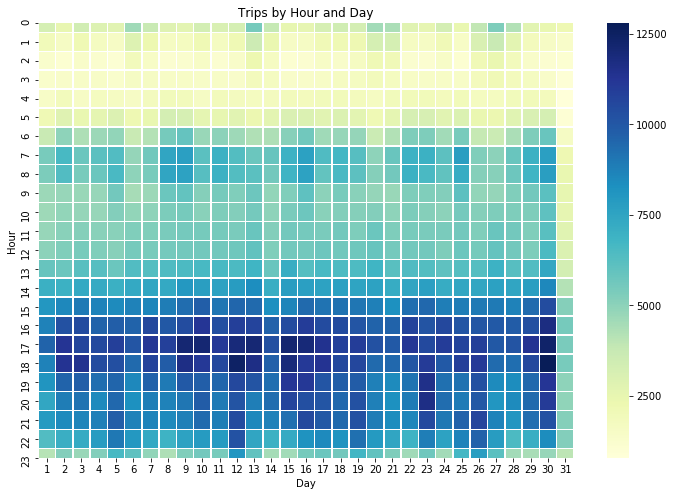

In [0]:
plt.figure(figsize = (12,8))

#Using the seaborn heatmap function 
ax = sns.heatmap(df_hour_day, cmap=cm.YlGnBu, linewidth = .5)
ax.set(title="Trips by Hour and Day");

#### Analysing the results

We see that the number of trips in increasing throughout the day, with a peak demand in the evening between 16:00 and 18:00.

It corresponds to the time where employees finish their work and go home.

### 2.2 Heatmap by Hour and Weekday

In [0]:
df_hour_weekday = df.groupby('Hour Weekday'.split(), sort = False).apply(count_rows).unstack()
df_hour_weekday.head()

Weekday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Monday
Hour,,,,,,,
0,6237,7644,9293,13716,27633,32877,6436
1,3509,4324,5290,8163,19189,23015,3737
2,2571,3141,3719,5350,12710,15436,2938
3,4494,4855,5637,6930,9542,10597,6232
4,7548,7511,8505,8806,6846,6374,9640


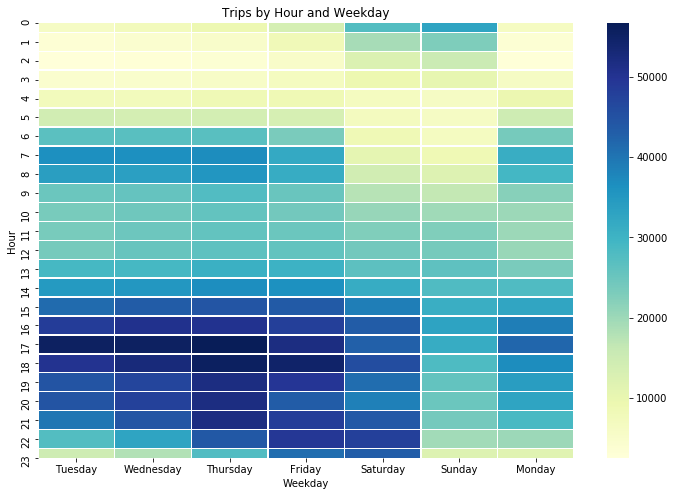

In [0]:
plt.figure(figsize = (12,8))

ax = sns.heatmap(df_hour_weekday, cmap=cm.YlGnBu, linewidth = .5)
ax.set(title="Trips by Hour and Weekday");

#### Analysing the results

We can see that on working days (From Monday to Friday) the number of trips is higher from 16:00 to 21:00. It shows even better what we said from the first heatmap.

On Friday the number of trips remains high until 23:00 and continues on early Saturday. It corresponds to the time where people come out from work, then go out for dinner or drink before the weekend.

We can notice the same pattern on Saturday, people tend to go out at night, the number of trips remains on high until early Sunday.

### 2.3 Heatmap by Day and Month

In [0]:
df_day_month = df.groupby('Day Month'.split(), sort = False).apply(count_rows).unstack()
df_day_month.head()

Month,April,May,June,July,August,September
Day,,,,,,
1,14546.0,23375.0,15967.0,21228.0,32353.0,19961.0
2,17474.0,24235.0,17503.0,26480.0,28678.0,28831.0
3,20701.0,22234.0,22674.0,21597.0,23146.0,32631.0
4,26714.0,13918.0,22831.0,14148.0,24952.0,38360.0
5,19521.0,17859.0,28371.0,10890.0,28094.0,42319.0


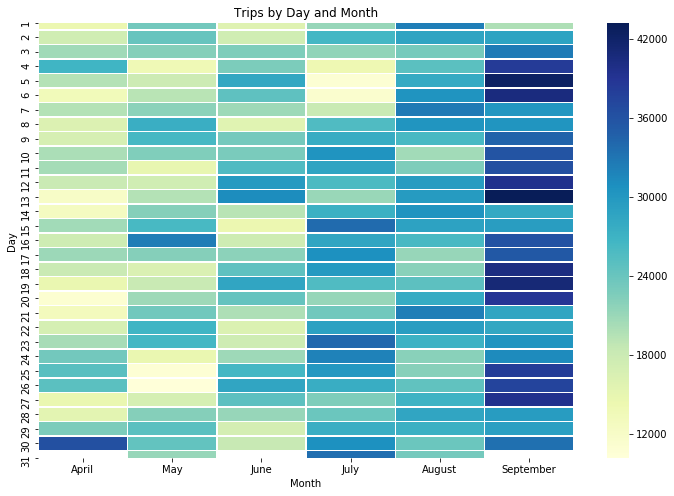

In [0]:
plt.figure(figsize = (12,8))

ax = sns.heatmap(df_day_month, cmap = cm.YlGnBu, linewidth = .5)
ax.set(title="Trips by Day and Month");

#### Analysing the results

We observe that the number of trips increases each month, we can say that from April to September 2014, Uber was in a continuous improvement process.

We can notice from the visualization a dark spot, it corresponds to the 30 April. The number of trips that day was extreme compared to the rest of the month.

Unfortunatly we have not been able to find any factual information to explain the pulse. A successful marketing strategy can be assumed to be in place that days. So as the analysis go on we consider that day an outliner.

In [0]:
#The number of trips the 30th of April
max_april = max(df_day_month['April'])

#The mean number of trips the rest of April
mean_rest_april = df_day_month['April'][0:29].sum() / 29

ratio_april = round(max_april / mean_rest_april)
print('The number of trips the 30th of April is {} times higher than the mean number of trips during the rest of the month'.format(ratio_april))

The number of trips the 30th of April is 2.0 times higher than the mean number of trips during the rest of the month


### 2.4 Heatmap by Month and Weekday

In [0]:
df_month_weekday = df.groupby('Month Weekday'.split(), sort = False).apply(count_rows).unstack()
df_month_weekday.head()

Weekday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Monday
Month,,,,,,,
April,91185,108631,85067,90303,77218,51251,60861
May,76662,89857,128921,133991,102990,56168,63846
June,88134,99654,115325,105056,81364,79656,94655
July,137454,147717,148439,102735,90260,76327,93189
August,107124,115256,124117,148674,132225,110246,91633


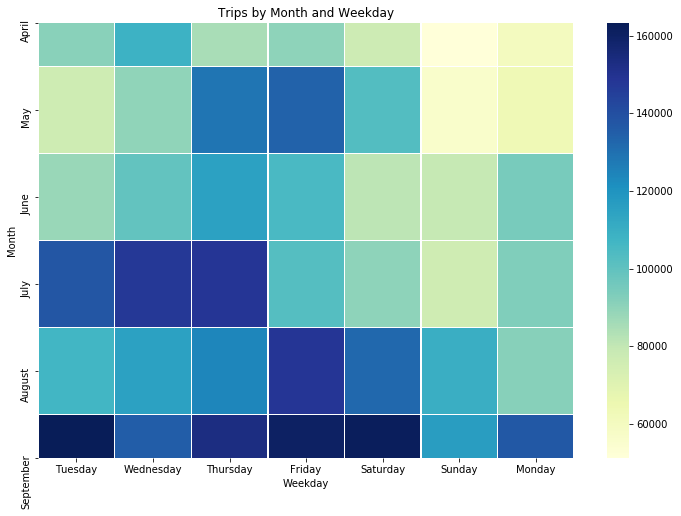

In [0]:
plt.figure(figsize = (12,8))

ax = sns.heatmap(df_month_weekday, cmap= cm.YlGnBu, linewidth = .5)
ax.set(title="Trips by Month and Weekday");

## 3 Spatial Visualization

In [0]:
#Setting up the limits
top, bottom, left, right = 41, 40.55, -74.3, -73.6

#Extracting the Longitude and Latitude of each pickup in our dataset
Longitudes = df['Lon'].values
Latitudes  = df['Lat'].values

### 3.1 Scatter visualization

For our first visualization we can reduce the need in computational power by dropping the duplicates in Latitude and Longitude.

In [0]:
df_reduced = df.drop_duplicates(['Lat','Lon'])

In [0]:
ratio_reduction = round((count_rows(df) - count_rows(df_reduced))/count_rows(df) * 100)
print('The dataset has been reduced by {}%'.format(ratio_reduction))

The dataset has been reduced by 87%


In [0]:
#Extracting the Longitude and Latitude of each pickup in our reduced dataset
Longitudes_reduced = df_reduced['Lon']
Latitudes_reduced  = df_reduced['Lat']

#### Spacial Animation

<IPython.core.display.Javascript object>


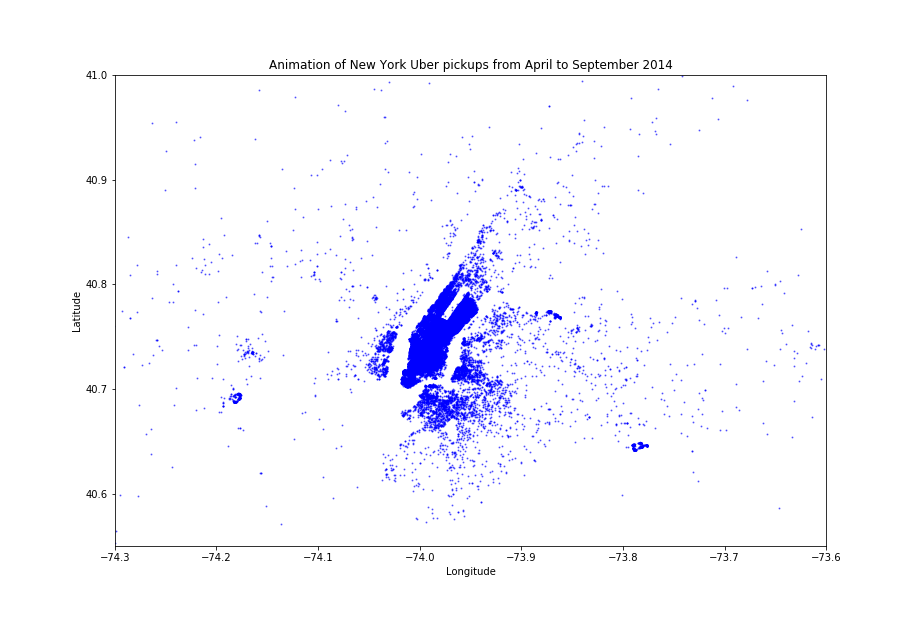

In [0]:
# %matplotlib inline in a Notebook causes plots to be shown as static images, only 1 call to %matplotlib inline is required.
# %matplotlib notebook in a Notebook enables some interactive features. 
%matplotlib notebook

fig = plt.figure(figsize = (12, 8)) 
ax = plt.axes(xlim=(left, right), ylim=(bottom, top)) 

dot, = ax.plot([], [], '.', ms=2, alpha=.5, color = 'blue') 

# initialization function 
def init(): 
    # creating an empty plot/frame 
    dot.set_data([], []) 
    return dot, 

# lists to store x and y axis points 
x_data, y_data = [], [] 

# animation function 
def animate(i): 

    # x, y values to be plotted 
    x = Longitudes_reduced.iloc[i] 
    y = Latitudes_reduced.iloc[i]
    
    # appending new points to x, y axes points list 
    x_data.append(x) 
    y_data.append(y) 
    dot.set_data(x_data, y_data) 
    return line, 

# setting a title for the plot 
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Animation of New York Uber pickups from April to September 2014') 

# call the animator
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=df_reduced.shape[0], interval=1, blit=True) 

## A few moments later 

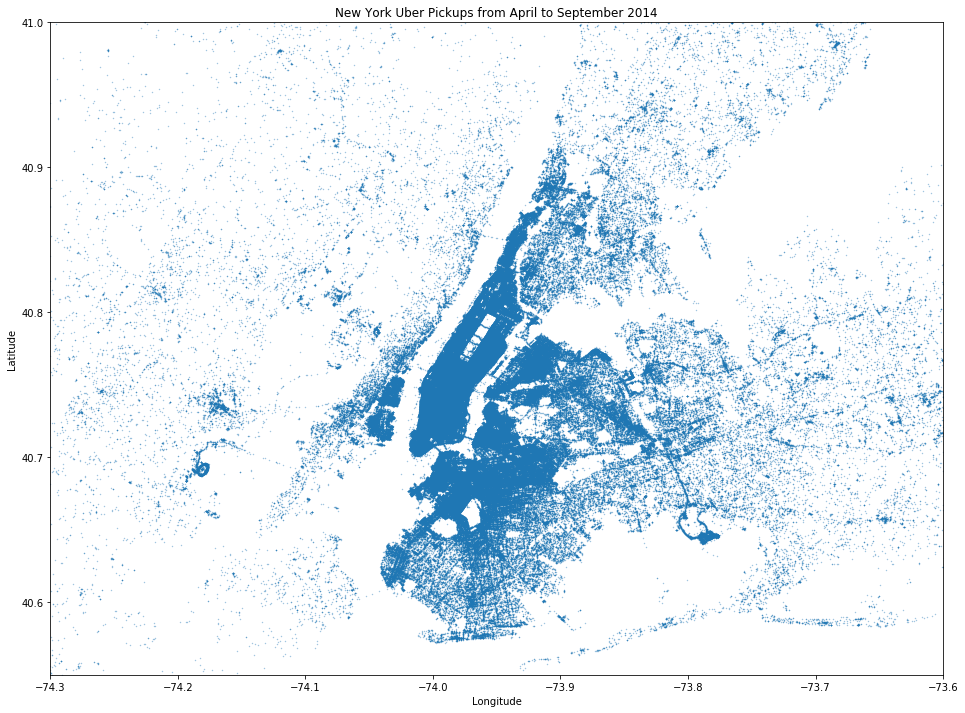

In [0]:
%matplotlib inline

plt.figure(figsize=(16, 12))

plt.plot(Longitudes_reduced, Latitudes_reduced, '.', ms=.8, alpha=.5)

plt.ylim(top=top, bottom=bottom)
plt.xlim(left=left, right=right)


plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('New York Uber Pickups from April to September 2014')

plt.show()

### 3.2 Heatmap visualization

This visualization is more demanding in computational power, since we can't use the reduce dataset if we want to get the number of pickups in the heatmap.

We will use Basemap to create the spacial heatmap.

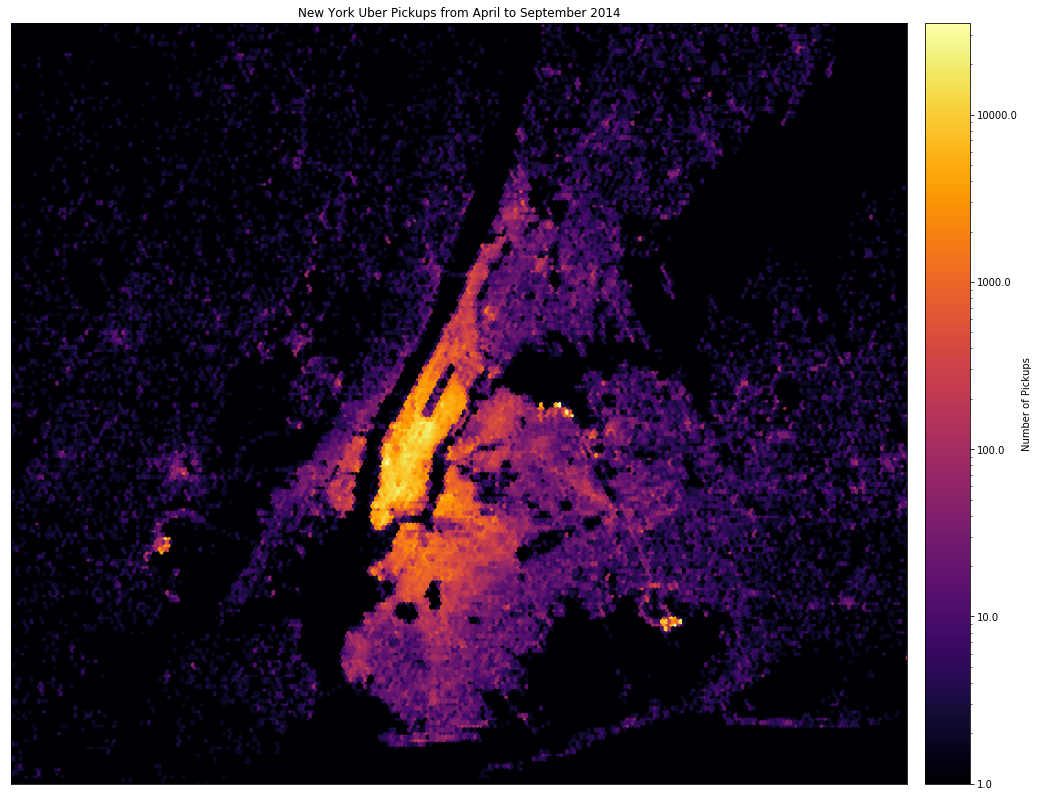

In [0]:
plt.figure(figsize=(18, 14))
plt.title('New York Uber Pickups from April to September 2014')

#https://matplotlib.org/basemap/api/basemap_api.html
map = Basemap(projection='merc', urcrnrlat=top, llcrnrlat=bottom, llcrnrlon=left, urcrnrlon=right)
x, y = map(Longitudes, Latitudes)
map.hexbin(x, y, gridsize=1000, bins='log', cmap=cm.inferno)
map.colorbar(location='right', format='%.1f', label='Number of Pickups');


### Analysing the results

From our spacial visualization we observe that:
- Most of Uber's trips in New York are made from Midtown to Lower Manhattan.
- Followed by Upper Manhattan and the Heights of Brooklyn.
- Lastly Jersey City and the rest of Brooklyn.

We see some brighter spots in our heatmap, corresponding to :
- LaGuardia Airport in East Elmhurst.
- John F. Kennedy International Airport.
- Newark Liberty International Airport.

We know that many airports have specific requirements about where customers can be picked up by vehicles on the Uber platform. We can assume that these three airports have them, since they represent a big part of uber's business in new york


### Created by MEBREK Brahim